In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd 
import os

In [3]:
os.chdir('/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/SpaGE_Datasets/scRNAseq/Moffit_RNA/')

In [4]:
adata = ad.read_h5ad("Moffit.h5ad")

# ANNOTATION #

In [3]:
adata = sc.read_10x_mtx(
    './GSE113576/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True) 
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 31299 × 27998
    var: 'gene_ids'

In [14]:
file_name = 'Moffit'

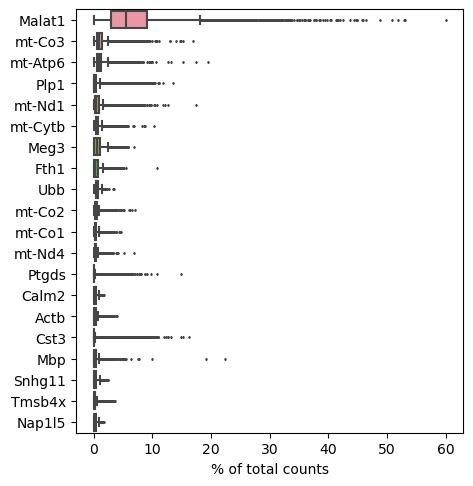

In [5]:
sc.pl.highest_expr_genes(adata, n_top=20, save='_'+file_name+'_scRNA.svg')

In [7]:
scvi = pd.read_csv('Moffit_RNA_data_scvi.csv')
scvi.index = scvi['Unnamed: 0']
del scvi['Unnamed: 0']
adata_rna = ad.AnnData(scvi)
adata_rna.obs_names = scvi.index
adata_rna.var_names = pd.Index(scvi.columns)

In [10]:
file_name = 'Moffit_scvi'

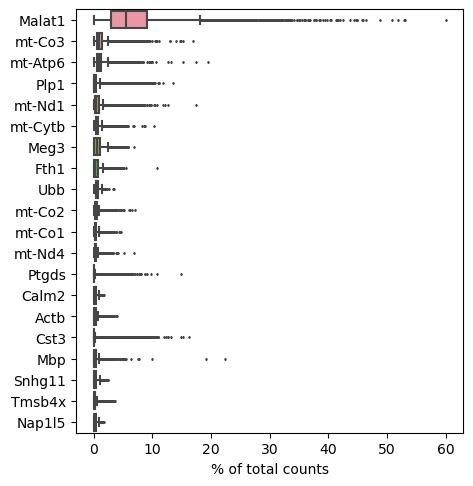

In [11]:
sc.pl.highest_expr_genes(adata_rna, n_top=20, save='_'+file_name+'_scRNA.svg')

In [12]:
adata_rna = adata.copy()

In [20]:
mito_gene = pd.read_csv("/data/lyx/ref/mouse_mitogene.csv")['Symbol'].to_list()

In [23]:
sc.pp.filter_genes(adata_rna, min_cells=3)
adata_rna.var['mt'] = adata_rna.var_names.isin(mito_gene) # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_rna, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata_rna.var['rb'] = adata_rna.var_names.str.startswith('^Rp[sl]')
sc.pp.calculate_qc_metrics(adata_rna, qc_vars=['rb'], percent_top=None, log1p=False, inplace=True)

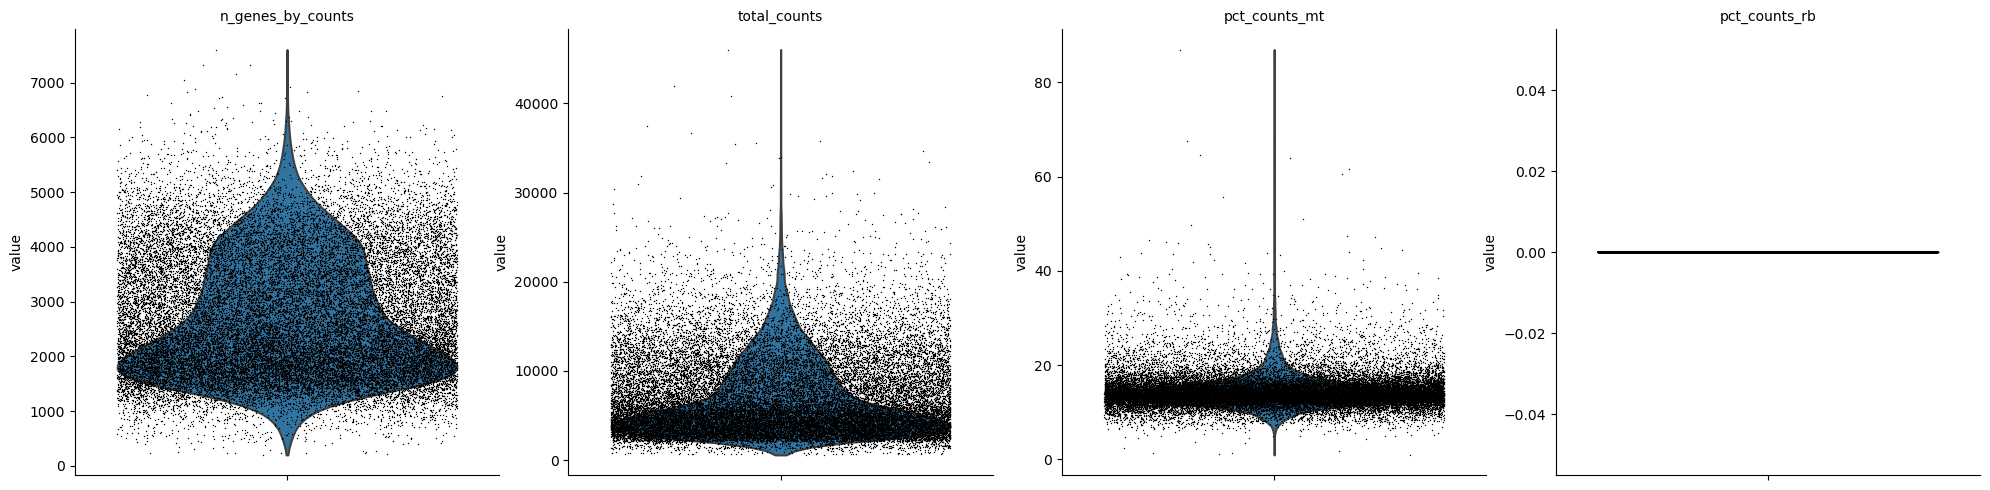

In [24]:
sc.pl.violin(adata_rna, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_rb'],
             jitter=0.4, multi_panel=True,save='_'+file_name+'_scRNA.svg')

In [139]:
adata_rna = adata.copy()

In [140]:
adata = adata_rna[adata_rna.obs.n_genes_by_counts > 500, :]
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]

In [141]:
adata

View of AnnData object with n_obs × n_vars = 29403 × 20390
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'sex', 'Replicate number', 'Cell class'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'rb'

/data/lyx/software/anaconda3/envs/env_simba/lib/python3.10/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/lyx/software/anaconda3/envs/env_simba/lib/python3.10/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


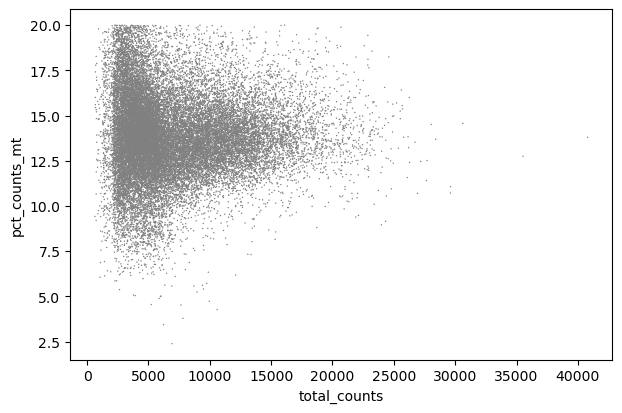

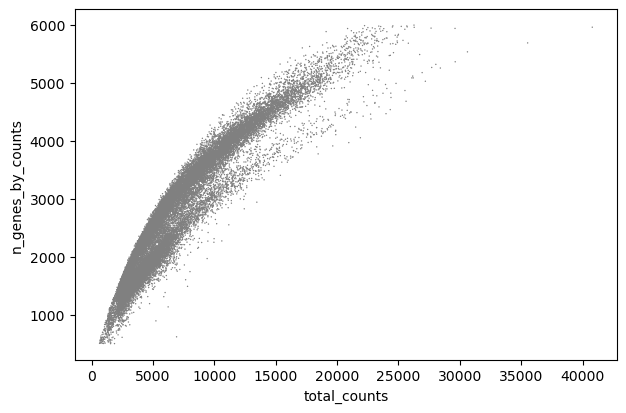

In [142]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt',save='_'+file_name+'_scRNA_mt.svg')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts',save='_'+file_name+'_scRNA_count.svg')

In [143]:
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

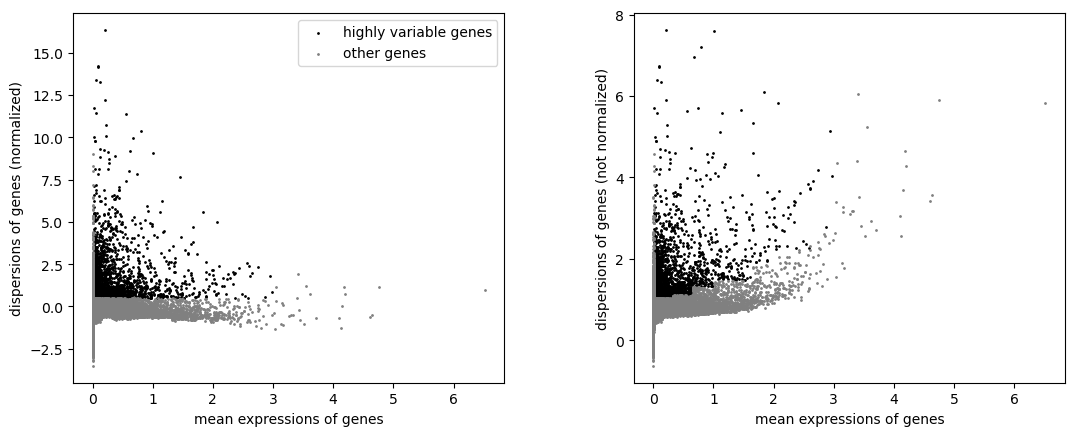

In [144]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata,save='_'+file_name+'_scRNA_hvg.svg')

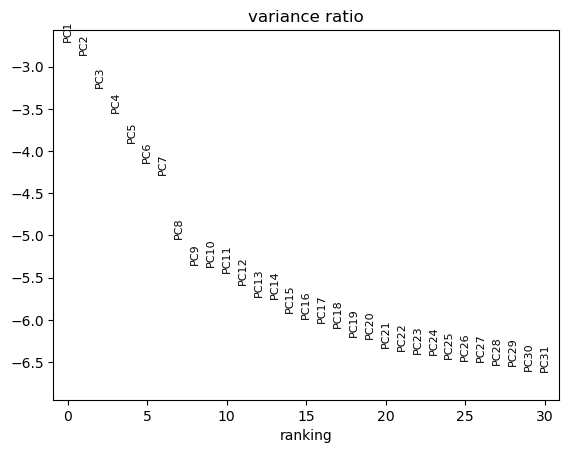

In [145]:
sc.pp.regress_out(adata, ['total_counts','pct_counts_mt'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [146]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=30)

/data/lyx/software/anaconda3/envs/env_simba/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/lyx/software/anaconda3/envs/env_simba/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/lyx/software/anaconda3/envs/env_simba/lib/pyth

In [147]:
sc.tl.umap(adata)

In [148]:
sc.tl.leiden(adata,resolution=0.2)

/data/lyx/software/anaconda3/envs/env_simba/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


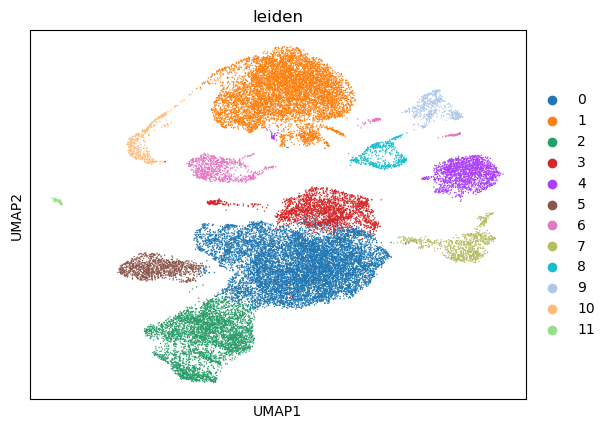

In [149]:
sc.pl.umap(adata, color='leiden')

/data/lyx/software/anaconda3/envs/env_simba/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


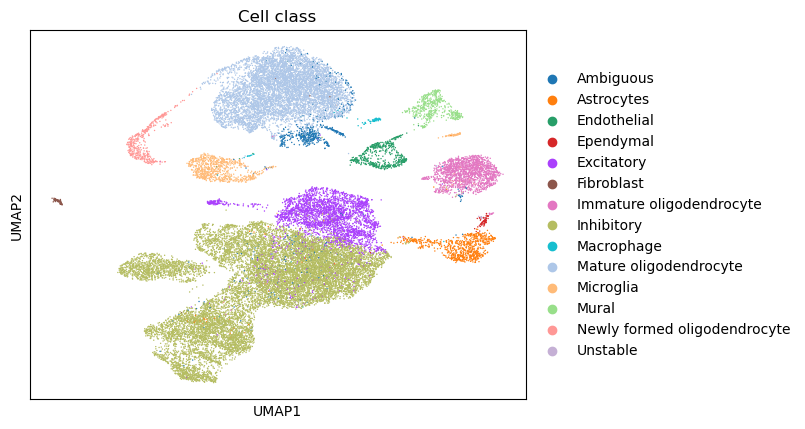

In [150]:
sc.pl.umap(adata, color='Cell class')

/data/lyx/software/anaconda3/envs/env_simba/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


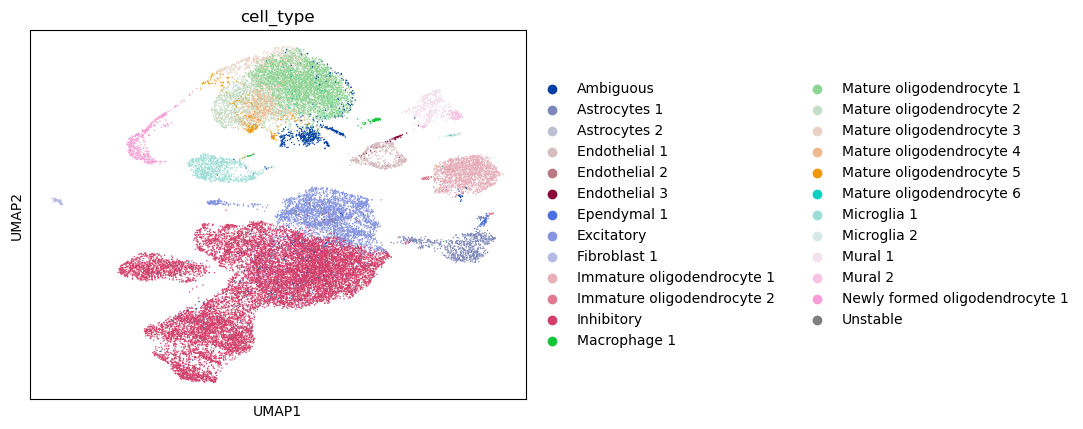

In [187]:
sc.pl.umap(adata, color='cell_type')

In [331]:
adata.write("Moffit.h5ad")

# ST #

### annotation ###

In [2]:
os.chdir('/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/MERFISH/')

In [8]:
merfish = pd.read_csv("/MERFISH.csv")

In [30]:
genes = list(set(merfish.columns)-
             set(['Cell_ID', 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma','Centroid_X', 'Centroid_Y', 
                  'Cell_class', 'Neuron_cluster_ID',"Blank",'Blank_1','Blank_2','Blank_3','Blank_4','Blank_5']))

In [30]:
var = []
for i in adata.var_names:
    if i == "4732456N10Rik":
        i='Krt90'
    var.append(i)

In [31]:
adata.var_names = pd.Index(var)

In [125]:
sc_ann = pd.read_csv("/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/SpaGE_Datasets/scRNAseq/Moffit_RNA/aau5324_moffitt_table-s1.csv")

In [157]:
sc_ann["Cluster"] = ""

0                    Fibroblast 1
1                  e17:Th/Adcyap1
2                      i6:Avp/Nms
3                  e16:Sst/Cartpt
4        Mature oligodendrocyte 3
                   ...           
31294                  i6:Avp/Nms
31295                  i6:Avp/Nms
31296                  i6:Avp/Nms
31297                 i23:Crh/Nts
31298              e9:Glut/Tcf7l2
Name: Cluster, Length: 31299, dtype: object

In [166]:
sc_ann["Cluster"][~sc_ann["Non-neuronal cluster (determined from clustering of all cells)"].isna()] = sc_ann[
    "Non-neuronal cluster (determined from clustering of all cells)"][~sc_ann["Non-neuronal cluster (determined from clustering of all cells)"].isna()].to_list()

/tmp/ipykernel_163786/1183047740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_ann["Cluster"][~sc_ann["Non-neuronal cluster (determined from clustering of all cells)"].isna()] = sc_ann[


In [169]:
sc_ann["Cluster"][sc_ann["Non-neuronal cluster (determined from clustering of all cells)"].isna()] = sc_ann[
    "Cell class (determined from clustering of all cells)"][sc_ann[
    "Non-neuronal cluster (determined from clustering of all cells)"].isna()].to_list()

/tmp/ipykernel_163786/1550794580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_ann["Cluster"][sc_ann["Non-neuronal cluster (determined from clustering of all cells)"].isna()] = sc_ann[


In [170]:
sc_ann["Cluster"].value_counts()

Cluster
Inhibitory                        15042
Mature oligodendrocyte 1           3561
Excitatory                         3511
Mature oligodendrocyte 2           1637
Immature oligodendrocyte 1         1632
Ambiguous                           841
Astrocytes 1                        793
Microglia 1                         767
Mature oligodendrocyte 3            620
Mature oligodendrocyte 4            578
Endothelial 1                       467
Newly formed oligodendrocyte 1      459
Mural 1                             364
Mature oligodendrocyte 5            262
Mural 2                             149
Unstable                             88
Macrophage 1                         79
Fibroblast 1                         72
Ependymal 1                          69
Astrocytes 2                         64
Microglia 2                          61
Immature oligodendrocyte 2           60
Mature oligodendrocyte 6             49
Endothelial 2                        39
Endothelial 3                   

In [173]:
sc_ann.to_csv("/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/SpaGE_Datasets/scRNAseq/Moffit_RNA/aau5324_moffitt_table-s1.csv")

In [174]:
# adata.obs['sex'] = sc_ann['Sex'].to_list()
# adata.obs['Replicate number'] = sc_ann['Replicate number'].to_list()
# adata.obs['Cell class'] = sc_ann['Cell class (determined from clustering of all cells)'].to_list()

In [179]:
sc_ann = sc_ann[sc_ann["Cell name"].isin(adata.obs_names)]

In [180]:
sort_order = adata.obs_names.to_list()
sc_ann["Cell name"] = pd.Categorical(sc_ann["Cell name"], categories=sort_order, ordered=True)
sc_ann = sc_ann.sort_values('Cell name')

/tmp/ipykernel_163786/1498827977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_ann["Cell name"] = pd.Categorical(sc_ann["Cell name"], categories=sort_order, ordered=True)


In [184]:
adata.obs['cell_type'] = sc_ann['Cluster'].to_list()

### match ###

In [66]:
st_exp = merfish[list((set(genes) & set(var)))].copy()

In [191]:
meta = merfish[['Cell_ID', 'Animal_ID', 'Animal_sex', 'Behavior', 
                'Bregma','Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID']].copy()

In [72]:
st_exp.index = pd.Index(meta.Cell_ID)

In [89]:
adata_st = ad.AnnData(st_exp)
adata_st.obs_names = st_exp.index
adata_st.var_names = pd.Index(st_exp.columns)

In [192]:
adata_st.obs =meta.copy()

In [193]:
adata_st.obs_names = adata_st.obs['Cell_ID'].to_list()

In [194]:
del adata_st.obs['Cell_ID']

In [114]:
import numpy as np
isx = np.isnan(adata_st.X)

In [118]:
mat = np.nan_to_num(adata_st.X)

In [120]:
adata_st = ad.AnnData(mat)
adata_st.obs_names = st_exp.index
adata_st.var_names = pd.Index(st_exp.columns)

In [119]:
del isx

In [105]:
file_name = 'MERFISH'

In [122]:
# sc.pp.highly_variable_genes(adata_st, min_mean=0.0125, max_mean=3, min_disp=0.5)
# sc.pl.highly_variable_genes(adata,save='_'+file_name+'_stRNA_hvg.svg')

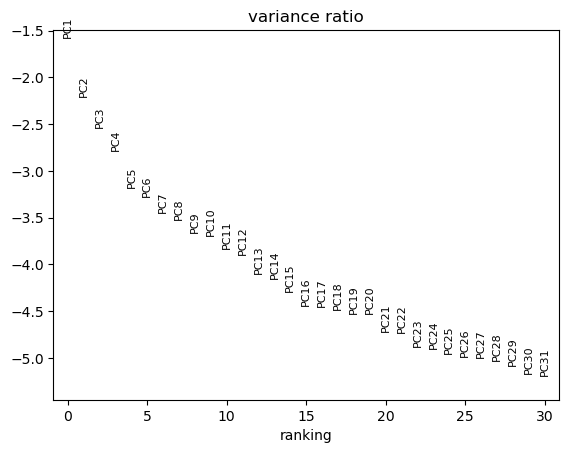

In [123]:
sc.tl.pca(adata_st, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_st, log=True)

In [152]:
sc.pp.neighbors(adata_st, n_neighbors=20, n_pcs=30)

In [210]:
tmp = adata_st.obs['Cell_class'].str.split(' ',expand=True)

In [242]:
Names = []
for i,r in tmp.iterrows():
    if r[0]=='OD':
        name = str(r[1])+' '+'oligodendrocyte'     
    else:
        name =r[0]
    Names.append(name)

In [243]:
adata_st.obs['main_type'] = Names

In [245]:
Names = []
for i in adata_st.obs.Cell_class:
    if i.startswith('OD'):
        tmp = i.split(' ')
        name = tmp[1]+' oligodendrocyte '+ tmp[2]
    else:
        name =i
    Names.append(name)

In [246]:
adata_st.obs['Cell_class'] = Names

In [247]:
adata_st.obs['Cell_class'].value_counts()

Cell_class
Inhibitory                    324178
Ambiguous                     153080
Excitatory                    143846
Astrocyte                     108560
Mature oligodendrocyte 2       85278
Endothelial 1                  50320
Immature oligodendrocyte 1     32043
Mature oligodendrocyte 1       28681
Endothelial 3                  21390
Microglia                      21165
Ependymal                      20473
Endothelial 2                  13392
Pericytes                       9995
Mature oligodendrocyte 4        9511
Mature oligodendrocyte 3        3256
Immature oligodendrocyte 2      2680
Name: count, dtype: int64

In [252]:
adata_st.obs.columns = ['Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X',
       'Centroid_Y', 'cell_type', 'Neuron_cluster_ID', 'main_type']

In [250]:
adata.obs.columns=['n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt',
       'total_counts_rb', 'pct_counts_rb', 'sex', 'Replicate number',
       'main_type', 'leiden', 'cell_type']

In [274]:
adata.obs['orignal_cell_type'] = adata.obs['cell_type']

In [312]:
adata.obs['orignal_cell_type'].value_counts()

orignal_cell_type
Inhibitory                        13797
Mature oligodendrocyte 1           3520
Excitatory                         3144
Mature oligodendrocyte 2           1621
Immature oligodendrocyte 1         1620
Microglia 1                         766
Ambiguous                           751
Astrocytes 1                        738
Mature oligodendrocyte 3            618
Mature oligodendrocyte 4            575
Endothelial 1                       460
Newly formed oligodendrocyte 1      453
Mural 1                             356
Mature oligodendrocyte 5            239
Mural 2                             148
Unstable                             84
Macrophage 1                         75
Fibroblast 1                         71
Ependymal                            66
Astrocytes 2                         64
Immature oligodendrocyte 2           60
Microglia 2                          60
Mature oligodendrocyte 6             48
Endothelial 3                        35
Endothelial 2         

In [321]:
adata_st.obs['cell_type'].value_counts()

cell_type
Inhibitory                    324178
Ambiguous                     153080
Excitatory                    143846
Astrocyte                     108560
Mature oligodendrocyte 2       85278
Endothelial 1                  50320
Immature oligodendrocyte 1     32043
Mature oligodendrocyte 1       28681
Endothelial 3                  21390
Microglia                      21165
Ependymal                      20473
Endothelial 2                  13392
Mural                           9995
Mature oligodendrocyte 4        9511
Mature oligodendrocyte 3        3256
Immature oligodendrocyte 2      2680
Name: count, dtype: int64

In [325]:
cell_type = list(set(adata_st.obs['cell_type']) & set(adata.obs['cell_type']))

In [324]:
set(adata_st.obs['cell_type'])-set(adata.obs['cell_type'])

set()

In [323]:
set(adata.obs['cell_type'])-set(adata_st.obs['cell_type'])

{'Fibroblast 1',
 'Macrophage 1',
 'Mature oligodendrocyte 5',
 'Mature oligodendrocyte 6',
 'Newly formed oligodendrocyte 1',
 'Unstable'}

In [317]:
adata.obs['cell_type'] = adata.obs['cell_type'].to_list()
adata_st.obs['cell_type'] = adata_st.obs['cell_type'].to_list()

In [270]:
adata.obs.loc[adata.obs['cell_type']=='Ependymal 1','cell_type'] = adata.obs['cell_type'][
    adata.obs['cell_type']=='Ependymal 1'].str.rstrip(' 1').to_list()

In [281]:
# adata.obs.loc[adata.obs['cell_type'].isin(['Astrocytes 1','Astrocytes 2']),'cell_type'] = adata.obs['cell_type'].str.split(' ',expand=True)[0][
#     adata.obs['cell_type'].isin(['Astrocytes 1','Astrocytes 2'])].to_list()
adata.obs.loc[adata.obs['cell_type']=='Astrocytes','cell_type'] = "Astrocyte"

In [284]:
adata.obs.loc[adata.obs['cell_type'].isin(['Microglia 1','Microglia 2']),'cell_type'] = adata.obs['cell_type'].str.split(' ',expand=True)[0][
    adata.obs['cell_type'].isin(['Microglia 1','Microglia 2'])].to_list()

In [318]:
adata_st.obs.loc[adata_st.obs['cell_type'].isin(['Pericytes']),'cell_type'] = 'Mural'

In [322]:
adata.obs.loc[adata.obs['cell_type'].isin(['Mural 1','Mural 2']),'cell_type'] = adata.obs['cell_type'].str.split(' ',expand=True)[0][
    adata.obs['cell_type'].isin(['Mural 1','Mural 2'])].to_list()

In [326]:
adata_use = adata[adata.obs.cell_type.isin(cell_type)].copy()

In [327]:
adata_st_use = adata_st[adata_st.obs.cell_type.isin(cell_type)].copy()

In [328]:
adata_st.write("/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/MERFISH/MERFISH.h5ad")

In [329]:
adata_use.write("Moffit_use.h5ad")

In [332]:
adata_st_use

AnnData object with n_obs × n_vars = 1027848 × 155
    obs: 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'cell_type', 'Neuron_cluster_ID', 'main_type'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [333]:
adata_use

AnnData object with n_obs × n_vars = 28433 × 20390
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'sex', 'Replicate number', 'main_type', 'leiden', 'cell_type', 'orignal_cell_type'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'rb', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Cell class_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [30]:
adata_st_use.write("/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/MERFISH/MERFISH_use.h5ad")

In [309]:
adata_st_use.obs.Animal_ID.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19, 12, 13,
       14, 15, 20, 21, 22, 23, 24, 34, 35, 36, 31, 32, 33, 25, 26, 27, 28,
       29, 30])

In [303]:
adata_st_use.obs.Neuron_cluster_ID.value_counts()

Neuron_cluster_ID
I-1     60550
I-2     22483
I-3     22434
I-4     19308
I-5     17039
        ...  
E-30      543
I-37      517
I-38      214
E-31      158
I-39       71
Name: count, Length: 70, dtype: int64

In [62]:
merfish.Bregma.value_counts() #头骨上矢状缝和冠状缝在高额头相交的点

Bregma
 0.11    175458
 0.16    172996
 0.21    165254
 0.26    161924
-0.14     48774
-0.04     48340
-0.19     48149
-0.29     47702
-0.09     47416
-0.24     43029
 0.01     34980
 0.06     33826
Name: count, dtype: int64

In [31]:
adata_use.write("/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/SpaGE_Datasets/scRNAseq/Moffit_RNA/Moffit_use.h5ad")

# MAKE data #

In [5]:
# adata_use =ad.read_h5ad("Moffit_use.h5ad")
adata_st_use =ad.read_h5ad("/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/MERFISH/MERFISH_use.h5ad")

In [15]:
os.chdir('/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/SpaGE_Datasets/scRNAseq/Moffit_RNA/')
adata_use =ad.read_h5ad("Moffit_use.h5ad")

In [27]:
adata_st_use.obs.main_type = adata_st_use.obs.main_type.to_list()
adata_use.obs.main_type = adata_use.obs.main_type.to_list()

In [20]:
adata_st_use.obs.loc[adata_st_use.obs.main_type=='Pericytes','main_type'] = 'Mural'

In [28]:
adata_use.obs.loc[adata_use.obs.main_type=='Astrocytes','main_type'] = 'Astrocyte'

In [29]:
list(set(adata_use.obs.main_type) - set(adata_st_use.obs.main_type))

[]

In [32]:
list(set(adata_use.obs.cell_type) - set(adata_st_use.obs.cell_type))

[]

In [33]:
len(set(adata_use.obs.cell_type))

16

In [34]:
len(set(adata_use.obs.main_type))

10

In [3]:
merfish = pd.read_csv("/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/MERFISH/MERFISH.csv")

In [4]:
merfish.index = merfish.Cell_ID.to_list()

In [6]:
merfish =merfish[['Cell_ID', 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma','Centroid_X', 'Centroid_Y', 
                  'Cell_class', 'Neuron_cluster_ID']]

In [10]:
merfish = merfish.drop_duplicates(['Animal_ID','Bregma'])

In [11]:
merfish =merfish[['Animal_ID','Bregma']]

In [13]:
merfish.to_csv("./MERFISH_dataset_meta.csv",index=None)

In [46]:
merfish_use = merfish.loc[adata_st_use.obs_names,adata_st_use.var_names].copy()

In [87]:
merfish_use.to_csv('/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/MERFISH/sc_data/sc_data.tsv',sep="\t")

In [88]:
adata_st_use

AnnData object with n_obs × n_vars = 1027848 × 155
    obs: 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'cell_type', 'Neuron_cluster_ID', 'main_type'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [66]:
tmp = merfish_use[merfish_use.isnull().values==True]

In [72]:
len(adata_st_use.obs.Animal_ID.unique())

36

In [85]:
sc_ann = adata_use.obs[['main_type']]
sc_ann.columns = ['bio_celltype']
sc_ann.to_csv("/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/MERFISH/sc_data/sc_label.tsv",sep="\t")

In [81]:
for i in adata_st_use.obs.Animal_ID.unique():
    ann = adata_st_use.obs[adata_st_use.obs.Animal_ID==i]
    ann[['main_type',"Animal_ID","Animal_sex","Behavior","Bregma","Neuron_cluster_ID"]].to_csv('/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/MERFISH/ST_'+str(i)+'_annotation.csv')
    #ann[['Centroid_X','Centroid_Y']].to_csv('/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/MERFISH/ST_'+str(i)+'_location.csv')
    
    # cell = adata_st_use.obs_names[adata_st_use.obs.Animal_ID==i]
    # merfish_use_tmp = merfish_use.loc[cell,:]
    # merfish_use_tmp.to_csv('/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/MERFISH/ST_data/ST_data_ID'+str(i)+'.tsv',sep="\t")
    # merfish_use_tmp.transpose().to_csv('/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/MERFISH/ST_data/ST_data_ID'+str(i)+'_transpose.tsv',sep="\t")

In [49]:
merfish_use.transpose().to_csv('/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/MERFISH/sc_data_transpose.tsv',sep="\t")

In [52]:
ann = adata_st_use.obs[['main_type']]

In [53]:
ann.to_csv('/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/MERFISH/ST_annotation.csv')

In [56]:
adata_st_use.obs[['Centroid_X','Centroid_Y']].to_csv('/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/MERFISH/ST_location.csv')

In [ ]:
data = pd.DataFrame(cortex_st_data.X)
data.columns = cortex_st_data.var_names
data.index = pd.Index(cortex_st_data.obs_names)
data.to_csv('/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/seqFISH_plus/ST_Cortex_exp_transpose.txt',sep="\t")
data.transpose().to_csv('/data/lyx/hubs/SpaTD/stdgcn/benchmark_data/seqFISH_plus/ST_Cortex_exp.txt',sep="\t")

In [24]:
adata = sc.read_10x_mtx(
    './GSE113576/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True) 
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 31299 × 27998
    var: 'gene_ids'

In [32]:
adata =adata[adata_use.obs_names,adata_use.var_names]

In [46]:
data = pd.DataFrame(adata.X.todense())

In [47]:
data.columns = adata.var_names
data.index = pd.Index(adata.obs_names)

In [50]:
data.to_csv('Moffit_use_exp.txt',sep="\t")

In [52]:
adata.obs

""
AAACCTGCACACAGAG-1
AAACCTGCACTACAGT-1
AAACCTGTCAGGATCT-1
AAACCTGTCGCACTCT-1
AAACGGGAGAACAATC-1
...
TTTGGTTCAGCTGCTG-6
TTTGGTTGTTATCACG-6
TTTGGTTGTTATTCTC-6
TTTGTCATCGTGGGAA-6
